# Full explanation : https://www.notion.so/Menyelamatkan-Profit-Superstore-dengan-Akurasi-MAPE-di-Bawah-15-2fd659dff8b380ee8a65c42118d5452c?source=copy_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [ ]:

url = "https://raw.githubusercontent.com/asepsr37/data-and-machine-learning/main/classification/superstore-time-series/dataset/Superstore.csv"

df = pd.read_csv(
    url,
    encoding='latin1'
)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# Menelaah Data

In [ ]:
# Struktur Data
df.shape

(9994, 21)

In [ ]:
# gambaran data
print(df.head(3))

   Row ID        Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0       1  CA-2013-152156  09-11-2013  12-11-2013  Second Class    CG-12520   
1       2  CA-2013-152156  09-11-2013  12-11-2013  Second Class    CG-12520   
2       3  CA-2013-138688  13-06-2013  17-06-2013  Second Class    DV-13045   

     Customer Name    Segment        Country         City  ... Postal Code  \
0      Claire Gute   Consumer  United States    Henderson  ...       42420   
1      Claire Gute   Consumer  United States    Henderson  ...       42420   
2  Darrin Van Huff  Corporate  United States  Los Angeles  ...       90036   

   Region       Product ID         Category Sub-Category  \
0   South  FUR-BO-10001798        Furniture    Bookcases   
1   South  FUR-CH-10000454        Furniture       Chairs   
2    West  OFF-LA-10000240  Office Supplies       Labels   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  2

In [ ]:
# tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Distribusi Pada Kolom Numerik


In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


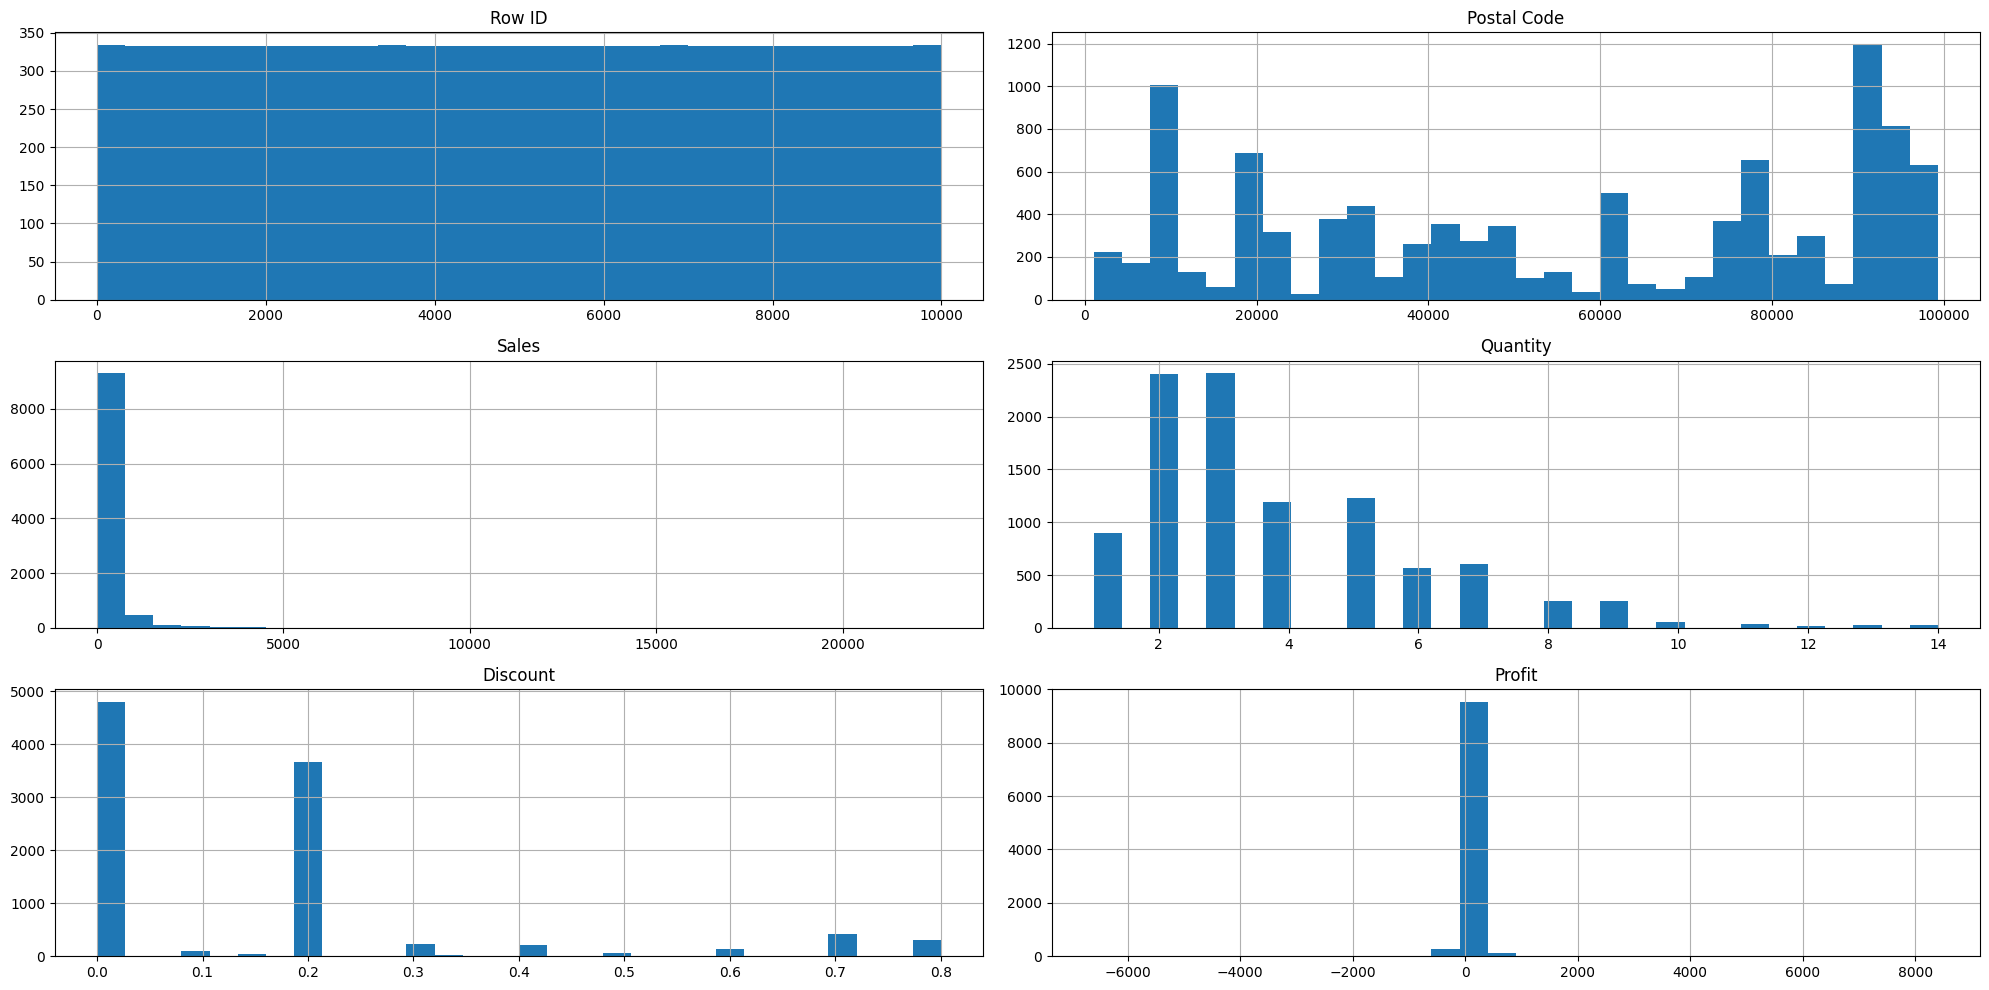

In [ ]:
# Distrbusi Data
kolom_numerik = df.select_dtypes(include='number').columns

df[kolom_numerik].hist(bins=30, figsize = (20,10))
plt.tight_layout()
plt.show()

## Distribusi pada Kolom Kategorikal

In [ ]:
kolom_kategorikal = df.select_dtypes(include='object').columns

# Melihat jumlah nilai unique
df[kolom_kategorikal].nunique()

,0
Order ID,5009
Order Date,1238
Ship Date,1334
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,531
State,49


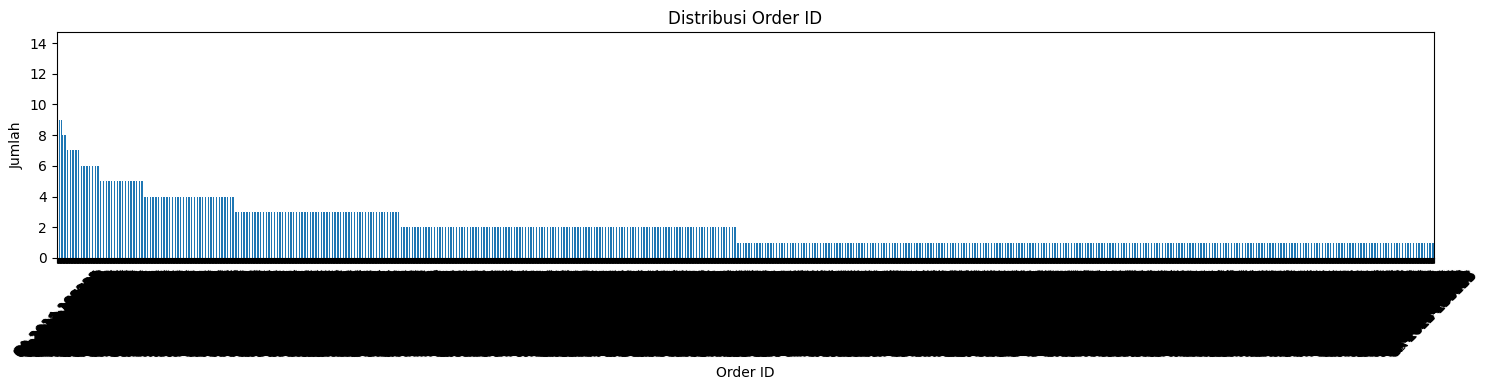

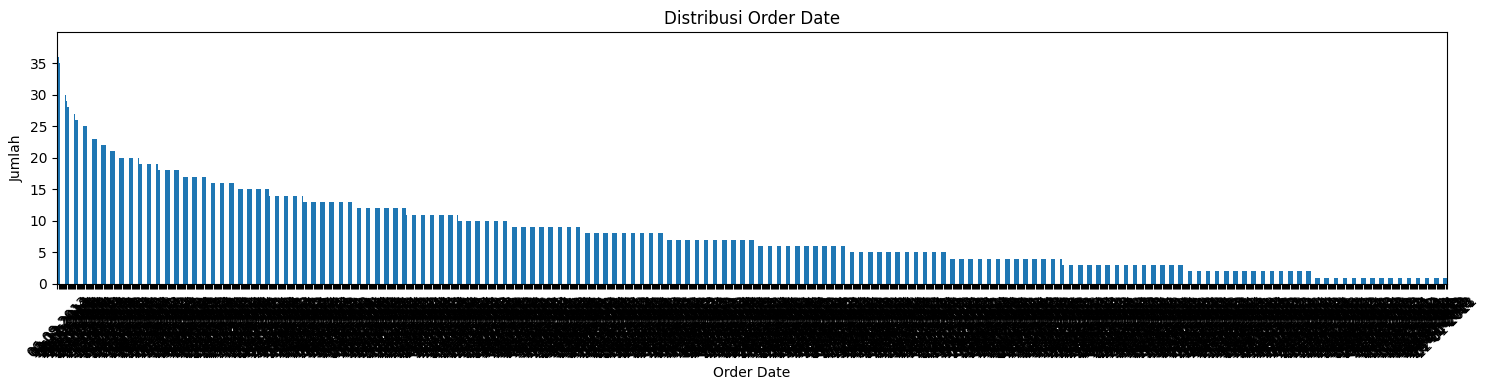

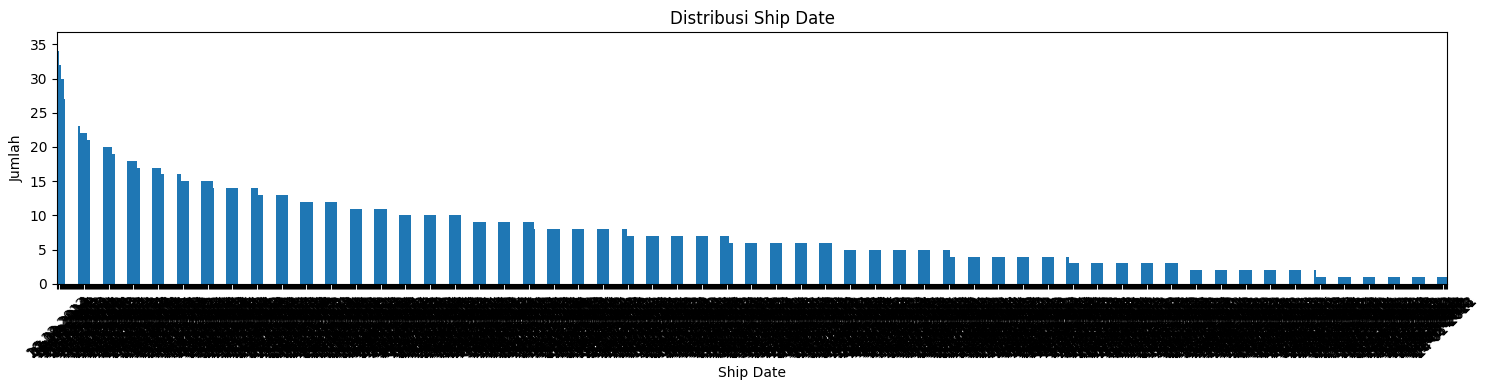

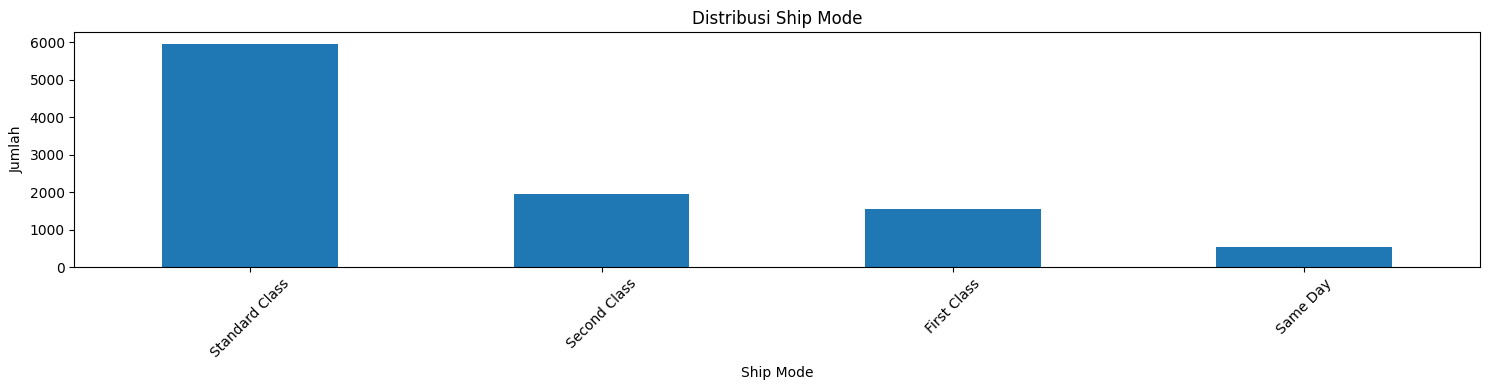

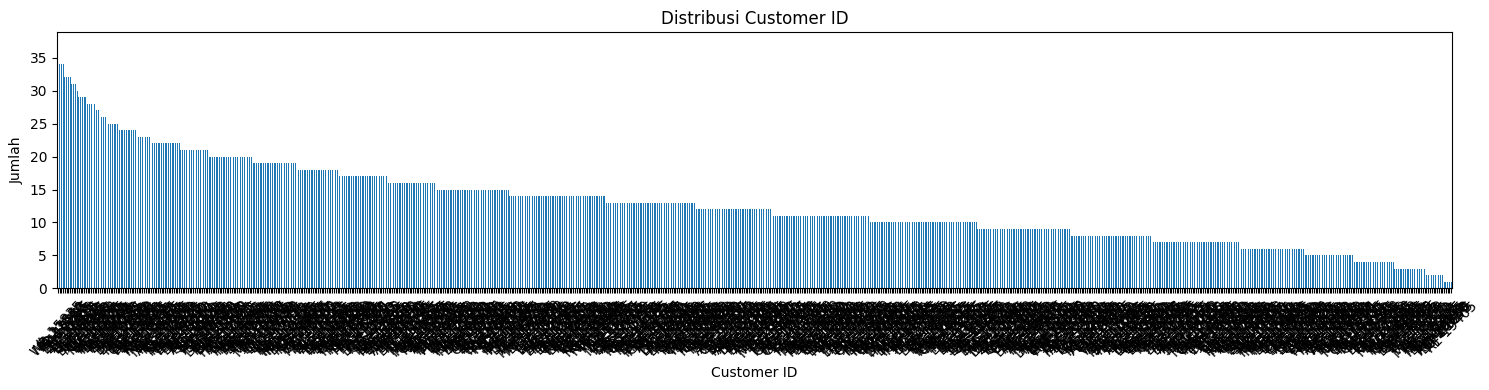

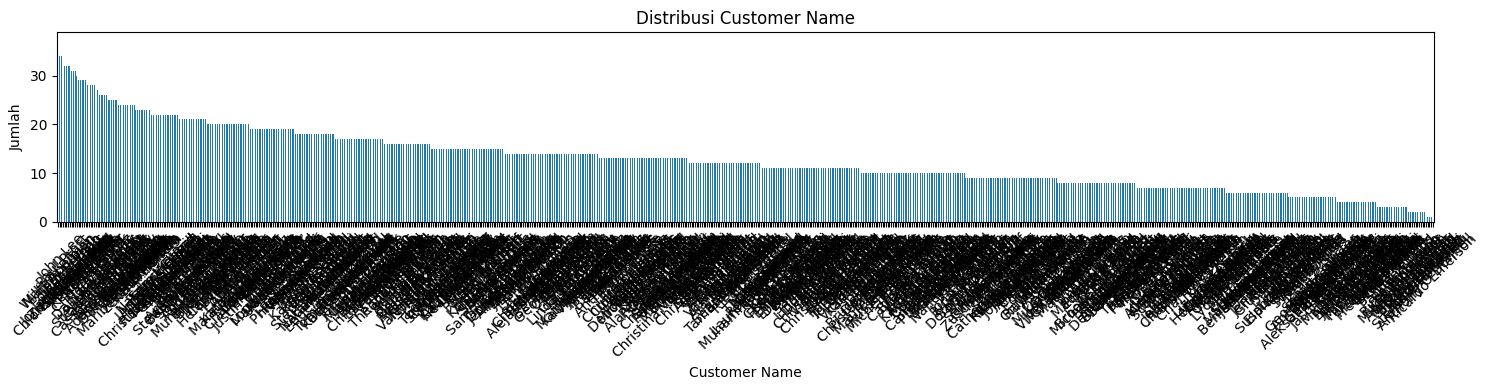

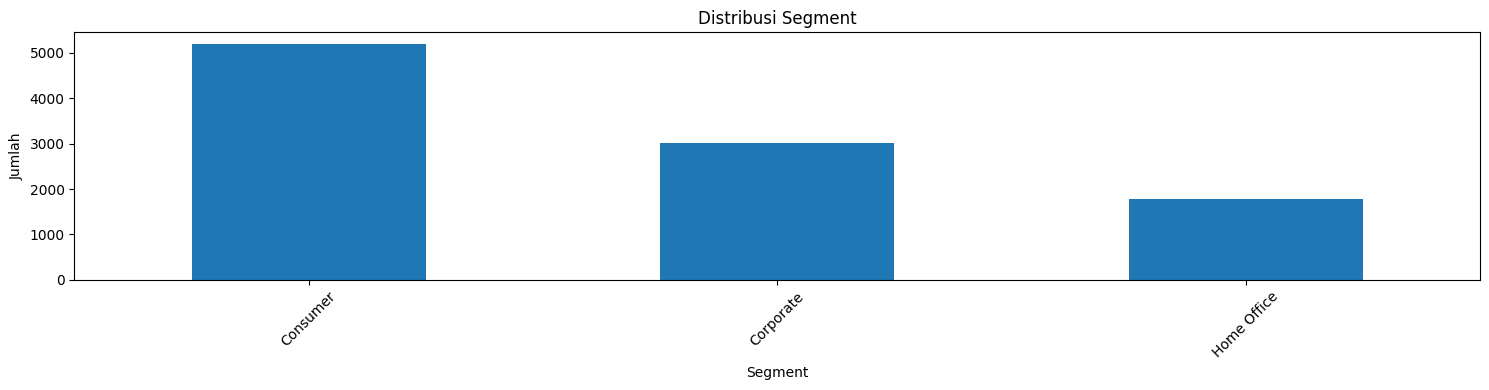

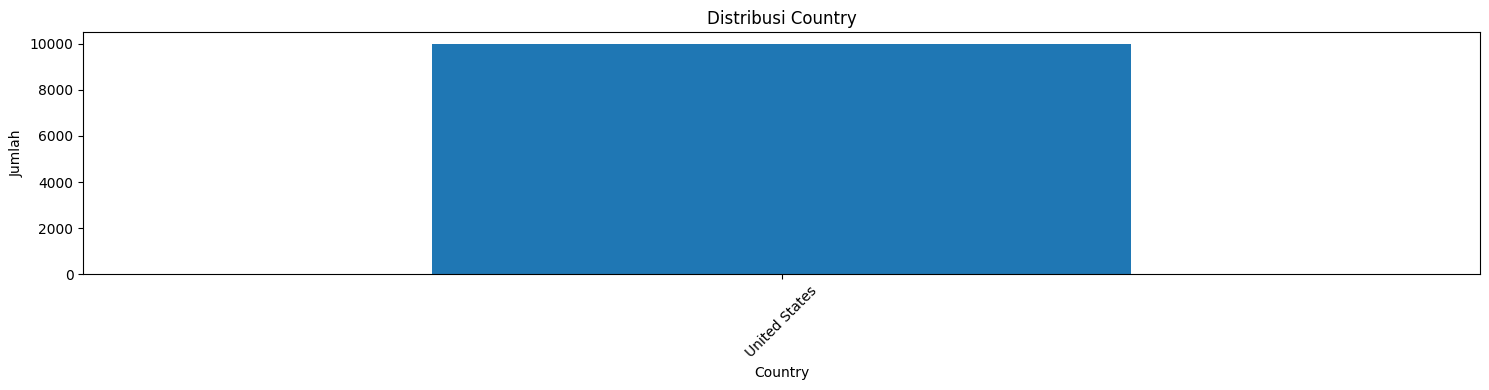

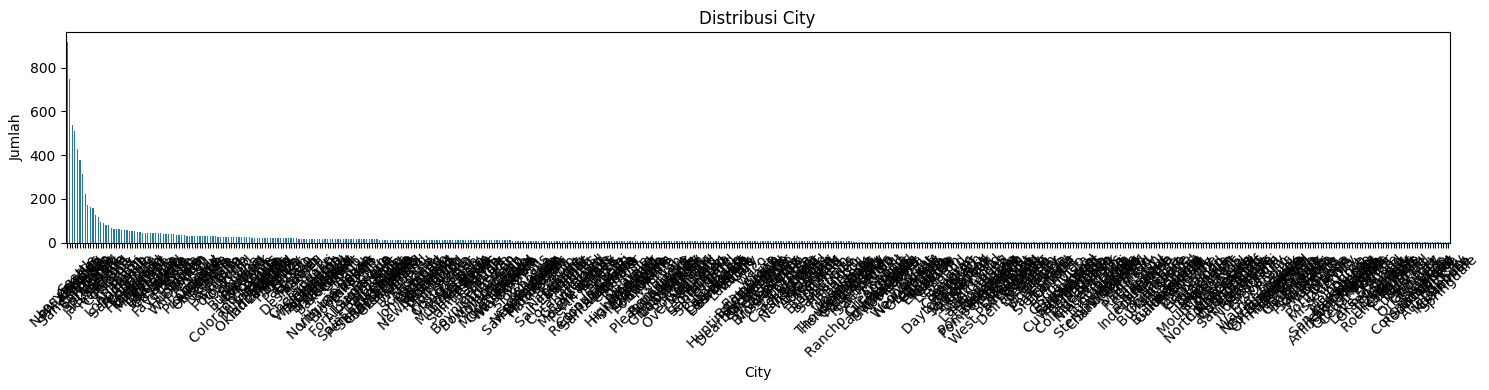

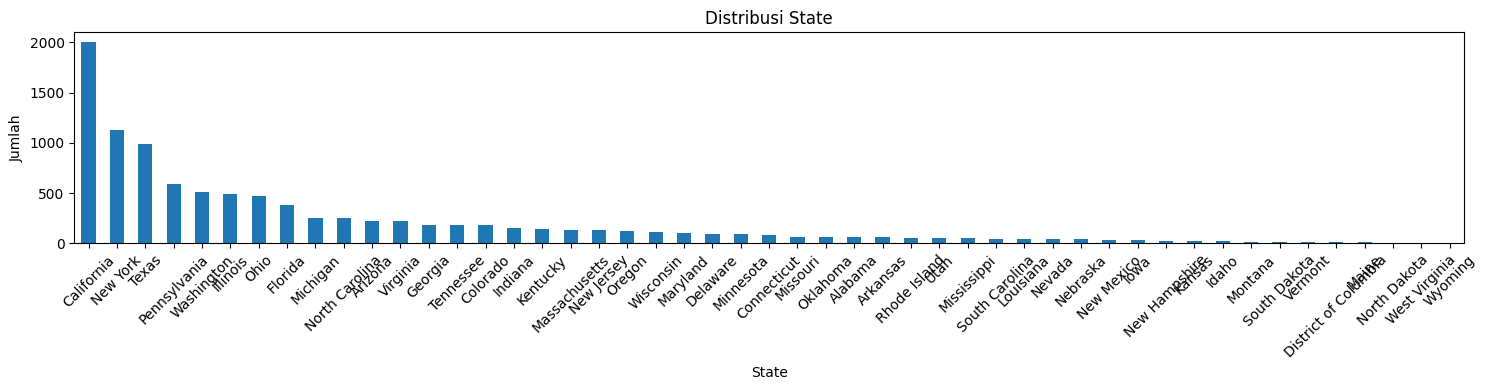

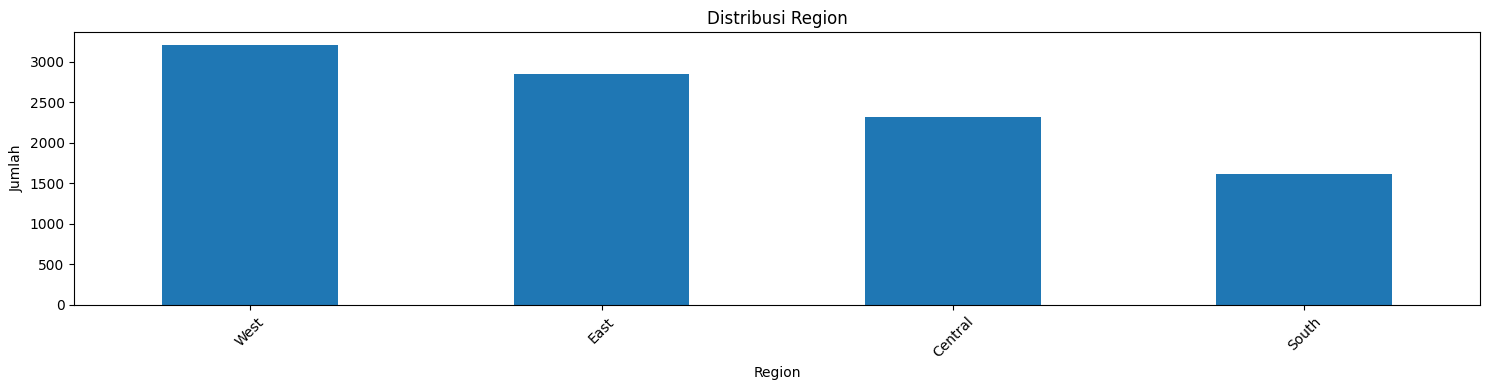

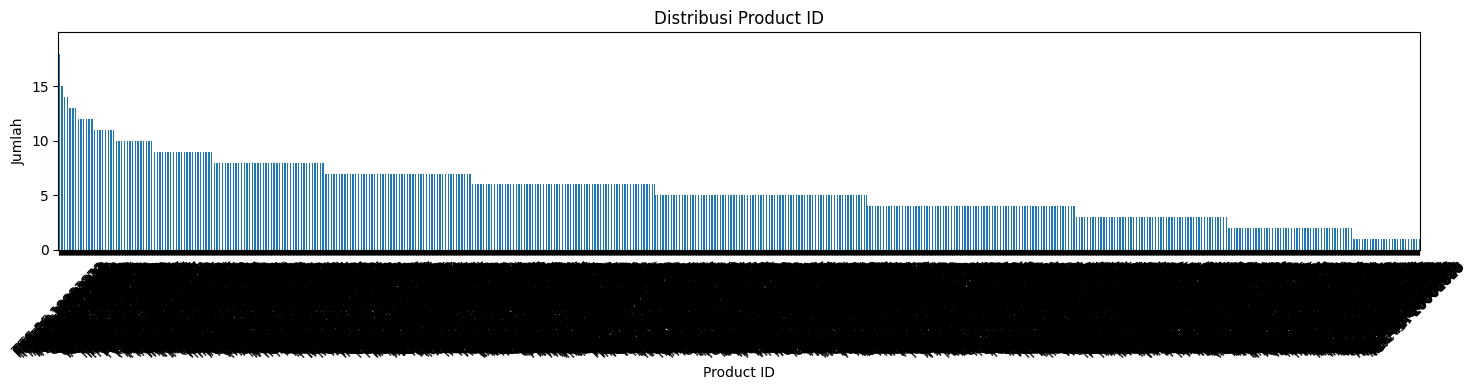

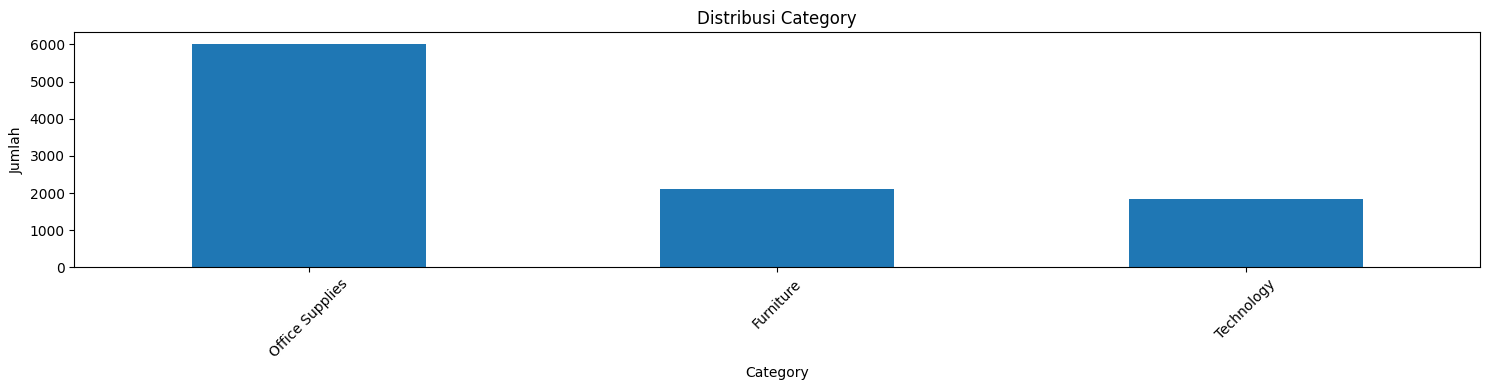

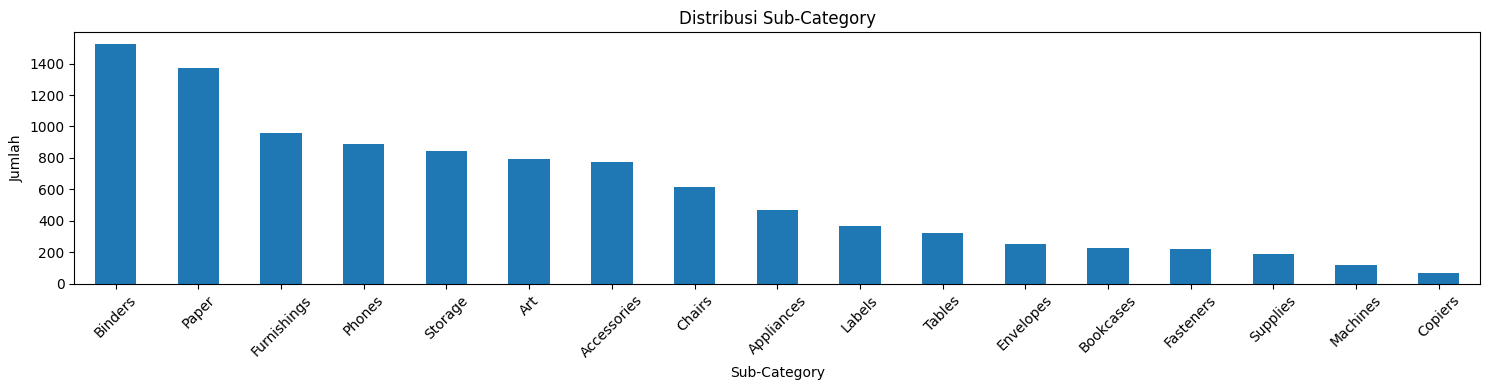

/tmp/ipython-input-3970978153.py:9: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3970978153.py:9: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3970978153.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


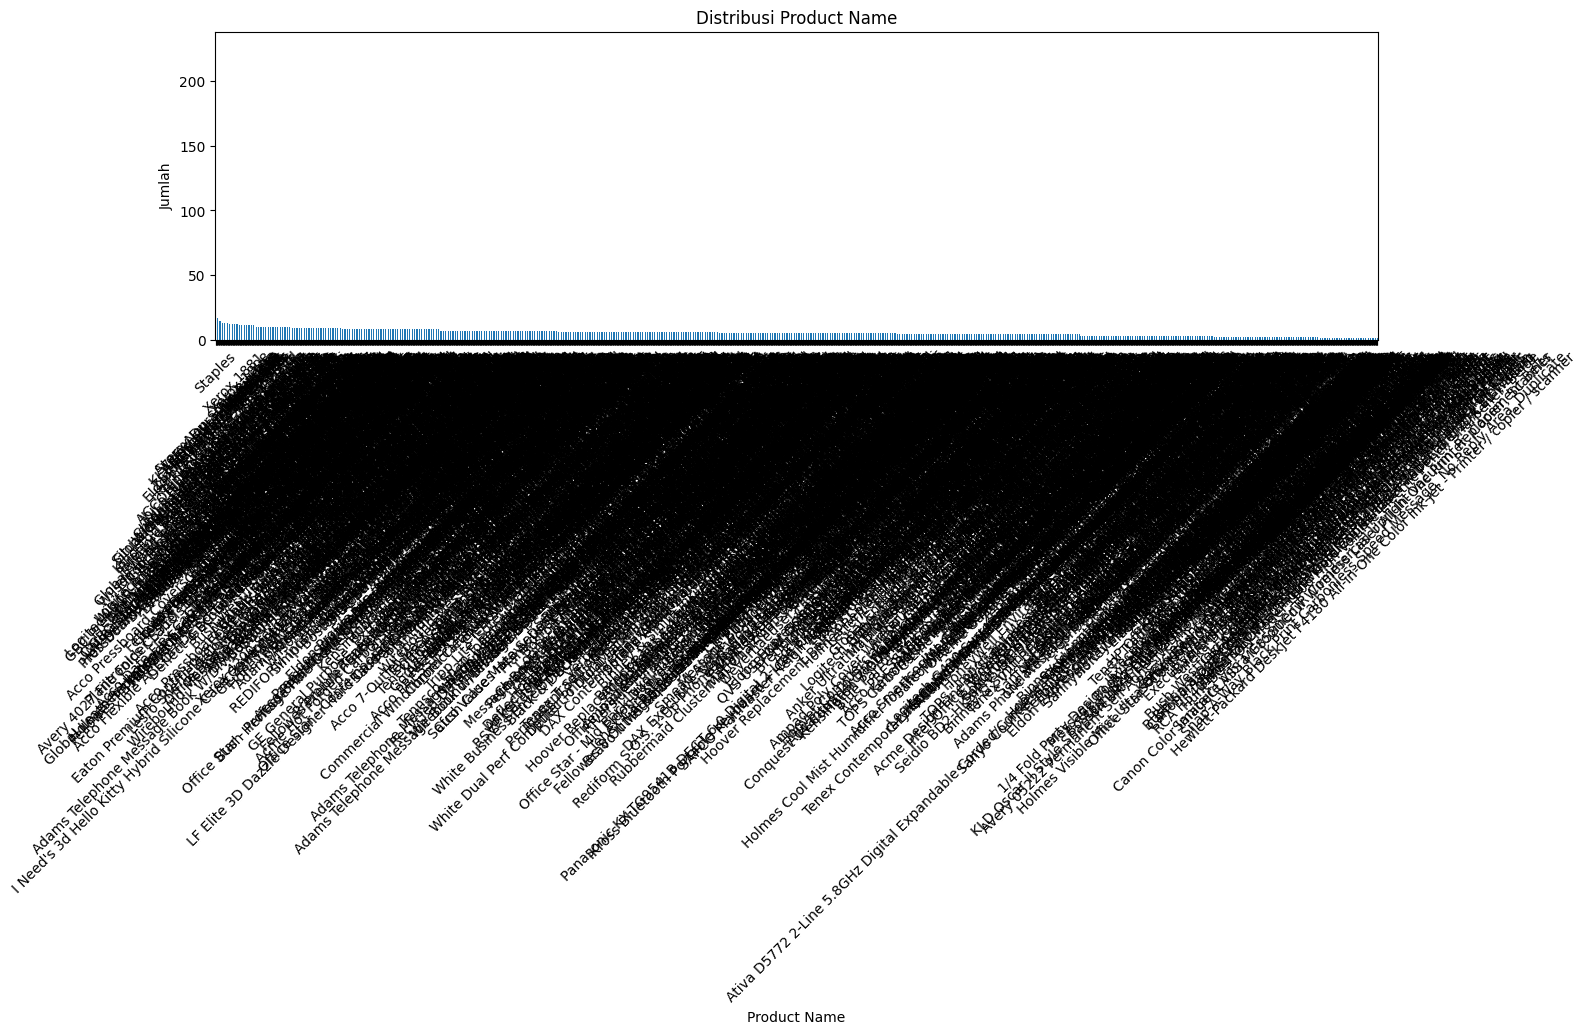

In [ ]:
# Distribusi
for col in kolom_kategorikal:
    plt.figure(figsize=(15,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Memvalidasi Data

In [ ]:
# Cek Missing Value
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Cek duplikat data
df.duplicated().sum()

np.int64(0)

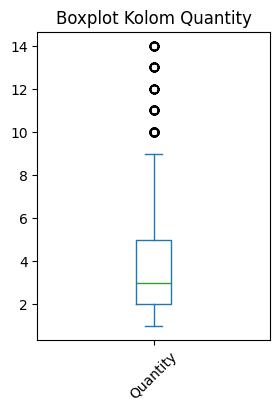

In [ ]:
# Cek Outliers pada kolom Numerik : Quantity
df['Quantity'].plot(kind='box',figsize=(3, 4))
plt.xticks(rotation=45)
plt.title("Boxplot Kolom Quantity")
plt.show()

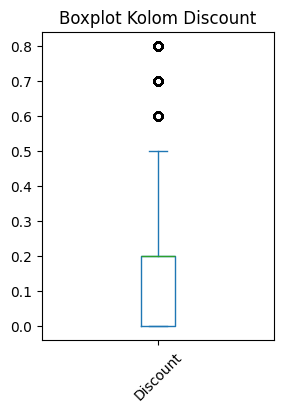

In [ ]:
# cek outlier pada kolom Numerik : Discount
df['Discount'].plot(kind='box',figsize=(3, 4))
plt.xticks(rotation=45)
plt.title("Boxplot Kolom Discount")
plt.show()

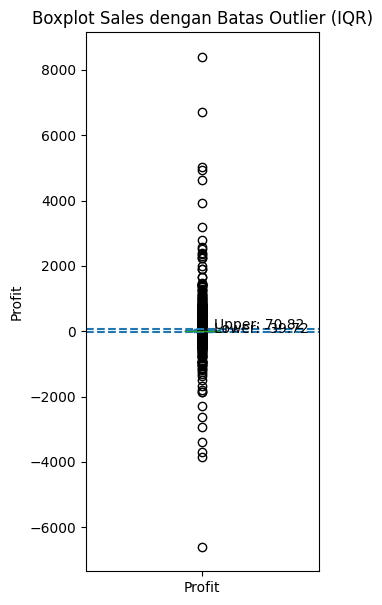

In [ ]:
# cek outlier pada kolom Numerik : Profit
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

plt.figure(figsize=(3, 7))
df['Profit'].plot(kind='box')

plt.axhline(upper, linestyle='--')
plt.axhline(lower, linestyle='--')

plt.text(1.05, upper, f'Upper: {upper:.2f}')
plt.text(1.05, lower, f'Lower: {lower:.2f}')

plt.title("Boxplot Profit dengan Batas Outlier (IQR)")
plt.ylabel("Profit")
plt.show()


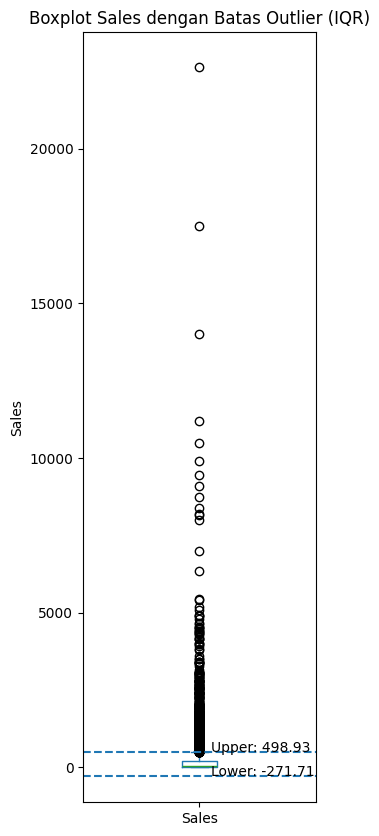

In [ ]:
# cek outlier pada kolom Numerik : Sales
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

plt.figure(figsize=(3, 10))
df['Sales'].plot(kind='box')

plt.axhline(upper, linestyle='--')
plt.axhline(lower, linestyle='--')

plt.text(1.05, upper, f'Upper: {upper:.2f}')
plt.text(1.05, lower, f'Lower: {lower:.2f}')

plt.title("Boxplot Sales dengan Batas Outlier (IQR)")
plt.ylabel("Sales")
plt.show()


In [ ]:
# cek pada kolom Profit dan sales, jika discount 50%-100%
summary = df[df['Discount'] >= 0.5][['Sales', 'Profit']].agg(['min', 'max'])
summary['Jumlah Data'] = df[df['Discount'] >= 0.5].shape[0]
summary

,Sales,Profit,Jumlah Data
min,0.444,-6599.9780,922
max,22638.480,-0.5964,922


In [ ]:
# cek nilai pada kolom sales tidak boleh kurang dari quantity
invalid_sales_qty = df[(df['Sales'] <= 0) | (df['Quantity'] <= 0)]
# cek nilai pada kolom discount harus rentang 0-1
invalid_discount = df[(df['Discount'] < 0) | (df['Discount'] > 1)]

print("Jumlah data tidak valid (Sales/Quantity <= 0)   : ", invalid_sales_qty.shape[0])
print("Jumlah data tidak valid (Discount < 0 atau > 1) : ", invalid_discount.shape[0])

Jumlah data tidak valid (Sales/Quantity <= 0)   :  0
Jumlah data tidak valid (Discount < 0 atau > 1) :  0


In [ ]:
# Cek nilai sales apakah ada yang kurang dari 1
# Cek nilai saless yang kurang dari 1
df[df['Sales'] < 1][['Sales', 'Quantity', 'Discount', 'Profit']]

,Sales,Quantity,Discount,Profit
2106,0.876,1,0.8,-1.4016
2761,0.990,1,0.0,0.4356
4101,0.444,1,0.8,-1.1100
4711,0.852,1,0.7,-0.5964
7548,0.898,1,0.8,-1.5715
8033,0.984,2,0.8,-1.4760
8658,0.836,1,0.8,-1.3376
9292,0.556,1,0.8,-0.9452
